In [47]:
using NRIRHOPM, Plots #, FileIO, Images, Plots, Interpolations, Memento; gr()

LoadError: ArgumentError: Module Plots not found in current path.
Run `Pkg.add("Plots")` to install the Plots package.

In [2]:
Pkg.dir("NRIRHOPM")

"C:\\Users\\qyp\\AppData\\Local\\JuliaPro-0.5.1.1\\pkgs-0.5.1.1\\v0.5\\NRIRHOPM"

In [3]:
fixed = readDIRLab("C:\\Users\\qyp\\Dropbox\\CTdata\\case5_T00-ssm.img", NRIRHOPM.DIRLab4DCT5);

In [4]:
moving = readDIRLab("C:\\Users\\qyp\\Dropbox\\CTdata\\case5_T50-ssm.img", NRIRHOPM.DIRLab4DCT5);

In [5]:
originΔ = vecnorm(moving-fixed)

327870.38476507756

In [49]:
displacetopo = [SVector(i,j,k) for i in -2:2, j in -2:2, k in -2:2]
displacements32 = [SVector(i,j,k) for i in -4:4, j in -4:4, k in -4:4]
displacements64 = [SVector(i,j,k) for i in -2:2, j in -2:2, k in -2:2]
displacements128 = [SVector(i,j,k) for i in -1:1, j in -1:1, k in -1:1]
displacementSet = [displacetopo, displacements32, displacements64, displacements128]
gridSet = [(32,32,26),(32,32,26),(64,64,53),(128,128,106)]
warpped, d, spec, energy = multilevel(fixed, moving, displacementSet, gridSet, 
α=1, β=2, χ=0, method=MixHOPM(maxIteration=50))
topologyΔ = vecnorm(warpped[end]-fixed)

[ 2017-03-21T16:48:20 | info ]: Start multilevel processing...
[ 2017-03-21T16:48:21 | info ]: Level 1: 
[ 2017-03-21T16:48:21 | info ]: Image Dimension: (256,256,106)
[ 2017-03-21T16:48:21 | info ]: Grid Dimension: (32,32,26)
[ 2017-03-21T16:48:21 | info ]: Creating data cost with weight=1: 
[ 2017-03-21T16:50:52 | info ]: 151.514350 seconds (7 allocations: 296.157 MB, 0.14% gc time)
[ 2017-03-21T16:50:52 | info ]: Creating smooth cost with weight=2: 
[ 2017-03-21T16:50:52 | info ]:   0.072693 seconds (29 allocations: 17.110 MB)
[ 2017-03-21T16:50:52 | info ]: Optimizing via High Order Power Method: 
[ 2017-03-21T16:58:38 | info ]: HOPM converges in 5 steps.
[ 2017-03-21T17:00:11 | info ]: 558.482276 seconds (2.35 k allocations: 3.760 GB, 0.32% gc time)
outboudscount = 9
[ 2017-03-21T17:00:21 | info ]: Level 2: 
[ 2017-03-21T17:00:21 | info ]: Image Dimension: (256,256,106)
[ 2017-03-21T17:00:21 | info ]: Grid Dimension: (64,64,53)
[ 2017-03-21T17:00:21 | info ]: Creating data cost wi

298029.07880834985

In [50]:
vecnorm(warpped[end]-fixed) - originΔ

-29841.30595672771

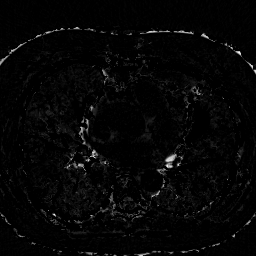

In [51]:
colorview(Gray, warpped[end][:,:,50]-fixed[:,:,50] |> x->x/maximum(x))

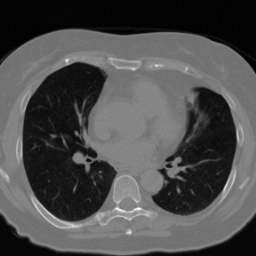

In [52]:
colorview(Gray, fixed[:,:,50] |> x->x/maximum(x))

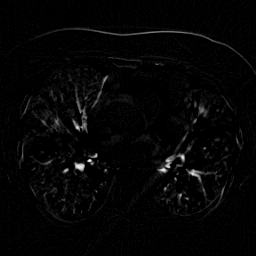

In [53]:
colorview(Gray, moving[:,:,50]-fixed[:,:,50] |> x->x/maximum(x))

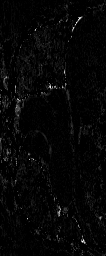

In [54]:
colorview(Gray, warpped[end][120,:,:]-fixed[120,:,:] |> x->x/maximum(x))

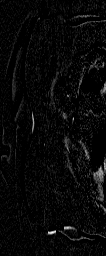

In [55]:
colorview(Gray, moving[50,:,:]-fixed[50,:,:] |> x->x/maximum(x))

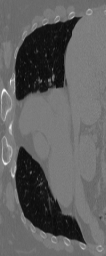

In [46]:
colorview(Gray, fixed[120,:,:] |> x->x/maximum(x))

In [ ]:
displacetopo = [SVector(i,j) for i in -3:3, j in -3:3]
displacementSet = [displacetopo]
gridSet = [(64,64)]
warpped, d, spec, energy = multilevel(fixed, moving, displacementSet, gridSet, topology=NRIRHOPM.TP2D(), 
α=1, β=10, χ=100, method=MixHOPM())
topologyΔ = vecnorm(warpped[end]-fixed)

[ 2017-03-15T19:35:56 | info ]: Start multilevel processing...
[ 2017-03-15T19:35:56 | info ]: Level 0: 
[ 2017-03-15T19:35:56 | info ]: Image Dimension: (64,64)
[ 2017-03-15T19:35:56 | info ]: Grid Dimension: (64,64)
[ 2017-03-15T19:35:56 | info ]: Creating data cost with weight=1: 
[ 2017-03-15T19:35:57 | info ]:   0.419285 seconds (3.13 M allocations: 87.518 MB, 14.15% gc time)
[ 2017-03-15T19:35:57 | info ]: Creating smooth cost with weight=10: 
[ 2017-03-15T19:35:57 | info ]:   0.001046 seconds (36 allocations: 551.297 KB)
[ 2017-03-15T19:35:57 | info ]: Creating topology cost with weight=100: 
[ 2017-03-15T19:35:57 | info ]:   0.035843 seconds (105 allocations: 7.936 MB, 25.44% gc time)
[ 2017-03-15T19:35:57 | info ]: Optimizing via High Order Power Method: 


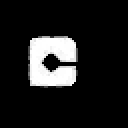

In [34]:
colorview(Gray, warpped[1])

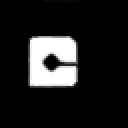

In [32]:
colorview(Gray, warpped[end])

In [29]:
displacementfield(meshgrid(d[end])...; size=(400,400)) # temp

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2 
 
 
 6 
 
 
 11 
 
 
 15 
 
 
 19 
 
 
 24 
 
 
 28 
 
 
 33 
 
 
 37 
 
 
 41 
 
 
 46 
 
 
 50 
 
 
 54 
 
 
 59 
 
 
 63 
 
 
 2 
 
 
 6 
 
 
 11 
 
 
 15 
 
 
 19 
 
 
 24 
 
 
 28 
 
 
 33 
 
 
 37 
 
 
 41 
 
 
 46 
 
 
 50 
 
 
 54 
 
 
 59 
 
 
 63 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,384.952 27.8516,384.952 33.9885,384.952 33.9885,384.952 40.1254,384.952 46.2622,384.952 52.3991,384.952 58.5359,384.952 64.6728,384.952 70.8096,384.952 
 76.9465,384.952 83.0833,384.952 89.2202,384.952 95.3571,384.952 101.494,384.952 107.631,384.952 113.768,384.952 119.904,384.952 126.041,384.952 132.178,384.952 
 138.315,384.952 144.452,384.952 150.589,384.952 156.726,384.952 162.862,384.952 168.999,384.952 175.136,384.952 181.273,384.952 187.41,384.952 193.547,384.952 
 199.684,384.952 205.82,384.952 211.957,384.952 218.094,384.952 224.231,384.952 230.368,384.952 236.505,384.952 242.642,384.952 248.778,384.952 254.915,384.952 
 261.052,384.952 267.189,384.952 273.326,384.952 279.463,384.952 285.6,384.952 291.736,384.952 297.873,384.952 304.01,384.952 310.147,384.952 316.284,384.952 
 322.421,384.952 328.558,384.952 334.694,384.952 340.831,384.952 346.968,384.952 353.105,384.952 359.242,384.952 365.379,384.952 371.516,384.952 377.652,384.952 
 383.789,384.952 389.926,384.952 396.063,384.952 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,378.706 27.8516,378.706 33.9885,378.706 33.9885,378.706 40.1254,378.706 46.2622,378.706 52.3991,378.706 58.5359,378.706 64.6728,378.706 70.8096,378.706 
 76.9465,378.706 83.0833,378.706 89.2202,378.706 95.3571,378.706 101.494,378.706 107.631,378.706 113.768,378.706 119.904,378.706 126.041,378.706 132.178,378.706 
 138.315,378.706 144.452,378.706 150.589,378.706 156.726,378.706 162.862,378.706 168.999,378.706 175.136,378.706 181.273,378.706 187.41,378.706 193.547,378.706 
 199.684,378.706 205.82,378.706 211.957,378.706 218.094,378.706 224.231,378.706 230.368,378.706 236.505,378.706 242.642,378.706 248.778,378.706 254.915,378.706 
 261.052,378.706 267.189,378.706 273.326,378.706 279.463,378.706 285.6,378.706 291.736,378.706 297.873,378.706 304.01,378.706 310.147,378.706 316.284,378.706 
 322.421,378.706 328.558,378.706 334.694,378.706 340.831,378.706 346.968,378.706 353.105,378.706 359.242,378.706 365.379,378.706 371.516,378.706 377.652,378.706 
 383.789,378.706 383.789,378.706 389.926,378.706 396.063,378.706 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3cb370; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,372.46 27.8516,372.46 33.9885,372.46 33.9885,372.46 40.1254,372.46 46.2622,372.46 52.3991,372.46 58.5359,372.46 64.6728,372.46 70.8096,372.46 
 76.9465,372.46 83.0833,372.46 89.2202,372.46 95.3571,372.46 101.494,372.46 107.631,372.46 113.768,372.46 119.904,372.46 126.041,372.46 132.178,372.46 
 138.315,372.46 144.452,372.46 150.589,372.46 156.726,372.46 162.862,372.46 168.999,372.46 175.136,372.46 181.273,372.46 187.41,372.46 193.547,372.46 
 199.684,372.46 205.82,372.46 211.957,372.46 218.094,372.46 224.231,372.46 230.368,372.46 236.505,372.46 242.642,372.46 248.778,372.46 254.915,372.46 
 261.052,372.46 267.189,372.46 273.326,372.46 279.463,372.46 285.6,372.46 291.736,372.46 297.873,372.46 304.01,372.46 310.147,372.46 316.284,372.46 
 322.421,372.46 328.558,372.46 334.694,372.46 340.831,372.46 346.968,372.46 353.105,372.46 359.242,372.46 365.379,372.46 371.516,372.46 377.652,372.46 
 383.789,372.46 383.789,372.46 389.926,372.46 396.063,372.46 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#d96fd5; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,372.46 27.8516,372.46 33.9885,372.46 40.1254,372.46 46.2622,372.46 52.3991,372.46 58.5359,372.46

In [39]:
displacementfield(meshgrid(d[end])...; size=(400,400)) #  only similarity measure

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2 
 
 
 6 
 
 
 11 
 
 
 15 
 
 
 19 
 
 
 24 
 
 
 28 
 
 
 33 
 
 
 37 
 
 
 41 
 
 
 46 
 
 
 50 
 
 
 54 
 
 
 59 
 
 
 63 
 
 
 2 
 
 
 6 
 
 
 11 
 
 
 15 
 
 
 19 
 
 
 24 
 
 
 28 
 
 
 33 
 
 
 37 
 
 
 41 
 
 
 46 
 
 
 50 
 
 
 54 
 
 
 59 
 
 
 63 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,384.952 27.8516,384.952 33.9885,384.952 33.9885,384.952 40.1254,384.952 46.2622,384.952 52.3991,384.952 58.5359,384.952 64.6728,384.952 70.8096,384.952 
 76.9465,384.952 83.0833,384.952 89.2202,384.952 95.3571,384.952 101.494,384.952 107.631,384.952 113.768,384.952 119.904,384.952 126.041,384.952 132.178,384.952 
 138.315,384.952 144.452,384.952 150.589,384.952 156.726,384.952 162.862,384.952 168.999,384.952 175.136,384.952 181.273,384.952 187.41,384.952 193.547,384.952 
 199.684,384.952 205.82,384.952 211.957,384.952 218.094,384.952 224.231,384.952 230.368,384.952 236.505,384.952 242.642,384.952 248.778,384.952 254.915,384.952 
 261.052,384.952 267.189,384.952 273.326,384.952 279.463,384.952 285.6,384.952 291.736,384.952 297.873,384.952 304.01,384.952 310.147,384.952 316.284,384.952 
 322.421,384.952 328.558,384.952 334.694,384.952 340.831,384.952 346.968,384.952 353.105,384.952 359.242,384.952 365.379,384.952 371.516,384.952 377.652,384.952 
 383.789,384.952 389.926,384.952 396.063,384.952 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,378.706 27.8516,378.706 33.9885,378.706 33.9885,378.706 40.1254,378.706 46.2622,378.706 52.3991,378.706 58.5359,378.706 64.6728,378.706 70.8096,378.706 
 76.9465,378.706 83.0833,378.706 89.2202,378.706 95.3571,378.706 101.494,378.706 107.631,378.706 113.768,378.706 119.904,378.706 126.041,378.706 132.178,378.706 
 138.315,378.706 144.452,378.706 150.589,378.706 156.726,378.706 162.862,378.706 168.999,378.706 175.136,378.706 181.273,378.706 187.41,378.706 193.547,378.706 
 199.684,378.706 205.82,378.706 211.957,378.706 218.094,378.706 224.231,378.706 230.368,378.706 236.505,378.706 242.642,378.706 248.778,378.706 254.915,378.706 
 261.052,378.706 267.189,378.706 273.326,378.706 279.463,378.706 285.6,378.706 291.736,378.706 297.873,378.706 304.01,378.706 310.147,378.706 316.284,378.706 
 322.421,378.706 328.558,378.706 334.694,378.706 340.831,378.706 346.968,378.706 353.105,378.706 359.242,378.706 365.379,378.706 371.516,378.706 377.652,378.706 
 383.789,378.706 389.926,378.706 396.063,378.706 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3cb370; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,372.46 27.8516,372.46 33.9885,378.706 33.9885,378.706 40.1254,378.706 46.2622,378.706 52.3991,378.706 58.5359,378.706 64.6728,378.706 70.8096,378.706 
 76.9465,378.706 83.0833,378.706 89.2202,378.706 95.3571,378.706 101.494,378.706 107.631,378.706 113.768,378.706 119.904,378.706 126.041,378.706 132.178,378.706 
 138.315,378.706 144.452,378.706 150.589,378.706 156.726,378.706 162.862,378.706 168.999,378.706 175.136,378.706 181.273,378.706 187.41,378.706 193.547,378.706 
 199.684,378.706 205.82,378.706 211.957,378.706 218.094,378.706 224.231,378.706 230.368,378.706 236.505,378.706 242.642,378.706 248.778,378.706 254.915,378.706 
 261.052,378.706 267.189,378.706 273.326,378.706 279.463,378.706 285.6,378.706 291.736,378.706 297.873,378.706 304.01,378.706 310.147,378.706 316.284,378.706 
 322.421,378.706 328.558,378.706 334.694,378.706 340.831,378.706 346.968,378.706 353.105,378.706 359.242,378.706 365.379,378.706 371.516,378.706 377.652,378.706 
 383.789,378.706 389.926,372.46 396.063,372.46 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#d96fd5; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,372.46 27.8516,372.46 33.9885,372.46 40.1254,372.46 46.2622,372.46 5

In [31]:
displacementfield(meshgrid(d[end])...; size=(400,400)) # β=0, χ=70, method=MixHOPM(maxIteration=40)) 6.40

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 3 
 
 
 7 
 
 
 11 
 
 
 16 
 
 
 20 
 
 
 24 
 
 
 28 
 
 
 32 
 
 
 37 
 
 
 41 
 
 
 45 
 
 
 49 
 
 
 54 
 
 
 58 
 
 
 62 
 
 
 1 
 
 
 5 
 
 
 10 
 
 
 14 
 
 
 18 
 
 
 23 
 
 
 27 
 
 
 32 
 
 
 36 
 
 
 40 
 
 
 45 
 
 
 49 
 
 
 53 
 
 
 58 
 
 
 62 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,384.952 21.7148,372.46 28.0597,372.46 34.4046,372.46 40.7494,372.46 47.0943,372.46 53.4392,372.46 59.7841,372.46 66.129,372.46 
 72.4739,372.46 78.8187,372.46 85.1636,372.46 91.5085,372.46 97.8534,372.46 104.198,372.46 110.543,372.46 116.888,372.46 123.233,372.46 129.578,372.46 
 135.923,372.46 161.302,384.952 161.302,384.952 167.647,384.952 180.337,384.952 180.337,384.952 180.337,384.952 180.337,384.952 
 218.406,384.952 218.406,384.952 218.406,384.952 231.096,384.952 237.441,384.952 
 243.786,384.952 269.165,372.46 275.51,372.46 281.855,372.46 288.2,372.46 294.545,372.46 300.89,372.46 307.235,372.46 313.579,372.46 319.924,372.46 
 326.269,372.46 332.614,372.46 338.959,372.46 345.304,372.46 351.649,372.46 357.994,372.46 364.339,372.46 370.683,372.46 377.028,372.46 383.373,372.46 
 389.718,372.46 389.718,372.46 396.063,372.46 396.063,384.952 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,372.46 21.7148,372.46 28.0597,372.46 28.0597,372.46 34.4046,372.46 40.7494,372.46 47.0943,372.46 53.4392,372.46 59.7841,372.46 66.129,372.46 
 72.4739,372.46 78.8187,372.46 85.1636,372.46 91.5085,372.46 97.8534,372.46 104.198,372.46 110.543,372.46 116.888,372.46 123.233,372.46 129.578,372.46 
 135.923,372.46 142.268,372.46 148.612,372.46 154.957,372.46 161.302,372.46 167.647,372.46 173.992,372.46 180.337,372.46 186.682,372.46 193.027,372.46 
 199.372,372.46 205.716,372.46 212.061,372.46 218.406,372.46 224.751,372.46 231.096,372.46 237.441,372.46 243.786,372.46 250.131,372.46 256.476,372.46 
 262.82,372.46 269.165,372.46 275.51,372.46 281.855,372.46 288.2,372.46 294.545,372.46 300.89,372.46 307.235,372.46 313.579,372.46 319.924,372.46 
 326.269,372.46 332.614,372.46 338.959,372.46 345.304,372.46 351.649,372.46 357.994,372.46 364.339,372.46 370.683,372.46 377.028,372.46 383.373,372.46 
 389.718,372.46 389.718,372.46 396.063,372.46 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3cb370; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,366.213 21.7148,366.213 21.7148,366.213 28.0597,372.46 34.4046,372.46 40.7494,372.46 47.0943,372.46 53.4392,372.46 59.7841,372.46 66.129,372.46 
 72.4739,372.46 78.8187,372.46 85.1636,372.46 91.5085,372.46 97.8534,372.46 104.198,372.46 110.543,372.46 116.888,372.46 123.233,372.46 129.578,372.46 
 135.923,372.46 142.268,372.46 148.612,372.46 154.957,372.46 161.302,372.46 167.647,372.46 173.992,372.46 180.337,372.46 186.682,372.46 193.027,372.46 
 199.372,372.46 205.716,372.46 212.061,372.46 218.406,372.46 224.751,372.46 231.096,372.46 237.441,372.46 243.786,372.46 250.131,372.46 256.476,372.46 
 262.82,372.46 269.165,372.46 275.51,372.46 281.855,372.46 288.2,372.46 294.545,372.46 300.89,372.46 307.235,372.46 313.579,372.46 319.924,372.46 
 326.269,372.46 332.614,372.46 338.959,372.46 345.304,372.46 351.649,372.46 357.994,372.46 364.339,372.46 370.683,372.46 377.028,372.46 383.373,372.46 
 389.718,372.46 396.063,366.213 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#d96fd5; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,366.213 21.7148,366.213 28.0597,366.213 34.4046,366.213 40.7494,366.213 47.0943,366.213 53.4392,366.213 59.7841,366.213 66.129,366.213 
 72.4739,366.213 78.8187,366.213 85.1636,366.213 91.5085,366.213 97.8534,366.213 104.198,366.213 110.543,366.213 116.888,366.213 123.233,366.213 129.578,366.213 
 135.923,366.213 142.268,366.213 148.612,366.213 154.957,3

In [21]:
displacementfield(meshgrid(d[end])...; xyInv=true, size=(300,300)) # β=1, χ=70, method=MixHOPM(maxIteration=40)) 6.47

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 3 
 
 
 7 
 
 
 11 
 
 
 16 
 
 
 20 
 
 
 24 
 
 
 28 
 
 
 32 
 
 
 37 
 
 
 41 
 
 
 45 
 
 
 49 
 
 
 54 
 
 
 58 
 
 
 62 
 
 
 3 
 
 
 7 
 
 
 11 
 
 
 15 
 
 
 19 
 
 
 23 
 
 
 27 
 
 
 32 
 
 
 36 
 
 
 40 
 
 
 44 
 
 
 48 
 
 
 52 
 
 
 56 
 
 
 60 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.6; stroke-opacity:1; fill:none" points="
 31.0147,284.952 31.0147,280.022 31.0147,275.092 31.0147,270.162 31.0147,265.232 31.0147,264.84 31.0147,264.762 31.0147,260.301 31.0147,255.371 31.0147,250.441 
 31.0147,245.511 31.0147,240.581 31.0147,235.651 31.0147,230.721 31.0147,225.791 31.0147,220.861 31.0147,215.931 31.0147,211.001 31.0147,206.071 31.0147,201.14 
 31.0147,196.21 31.0147,191.28 31.0147,186.35 31.0147,181.42 31.0147,176.49 31.0147,171.56 31.0147,166.63 31.0147,161.7 31.0147,156.77 31.0147,151.84 
 31.0147,146.909 31.0147,141.979 31.0147,137.049 31.0147,132.119 31.0147,127.189 31.0147,122.259 31.0147,117.329 31.0147,112.399 31.0147,107.469 31.0147,102.539 
 31.0147,97.6086 31.0147,92.6785 31.0147,87.7485 31.0147,82.8184 31.0147,77.8883 31.0147,72.9582 31.0147,68.0281 31.0147,63.098 31.0147,58.1679 31.0147,53.2379 
 31.0147,48.3078 31.0147,43.3777 31.0147,38.4476 31.0147,33.5175 31.0147,28.5874 31.0147,23.6573 31.0147,18.7273 31.0147,14.2667 31.0147,14.1885 31.0147,13.7972 
 31.0147,8.86709 30.8671,4.09352 26.2909,4.01526 21.7148,3.93701 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.6; stroke-opacity:1; fill:none" points="
 31.0885,280.1 31.0885,277.557 31.0885,275.015 31.0885,270.162 31.0885,265.232 31.0885,264.84 31.0885,264.762 31.0885,260.301 31.0885,255.371 31.0885,250.441 
 31.0885,245.511 31.0885,240.581 31.0885,235.651 31.0885,230.721 31.0885,225.791 31.0885,220.861 31.0885,215.931 31.0885,211.001 31.0885,206.071 31.0885,201.14 
 31.0885,196.21 31.0885,191.28 31.0885,186.35 31.0885,181.42 31.0885,176.49 31.0885,171.56 31.0885,166.63 31.0885,161.7 31.0885,156.77 31.0885,151.84 
 31.0885,146.909 31.0885,141.979 31.0885,137.049 31.0885,132.119 31.0885,127.189 31.0885,122.259 31.0885,117.329 31.0885,112.399 31.0885,107.469 31.0885,102.539 
 31.0885,97.6086 31.0885,92.6785 31.0885,87.7485 31.0885,82.8184 31.0885,77.8883 31.0885,72.9582 31.0885,68.0281 31.0885,63.098 31.0885,58.1679 31.0885,53.2379 
 31.0885,48.3078 31.0885,43.3777 31.0885,38.4476 31.0885,33.5175 31.0885,28.5874 31.0885,23.6573 31.0885,18.7273 31.0885,14.2667 31.0885,14.1885 31.0885,13.7972 
 31.0885,8.86709 31.0136,4.09352 28.6892,4.01526 26.3648,3.93701 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3cb370; stroke-width:0.6; stroke-opacity:1; fill:none" points="
 31.1623,275.248 31.1623,275.093 31.1623,274.938 31.1623,270.162 31.1623,265.232 31.1623,264.84 31.1623,264.762 31.1623,260.301 31.1623,255.371 31.1623,250.441 
 31.1623,245.511 31.1623,240.581 31.1623,235.651 31.1623,230.721 31.1623,225.791 31.1623,220.861 31.1623,215.931 31.1623,211.001 31.1623,206.071 31.1623,201.14 
 31.1623,196.21 31.1623,191.28 31.1623,186.35 31.1623,181.42 31.1623,176.49 31.1623,171.56 31.1623,166.63 31.1623,161.7 31.1623,156.77 31.1623,151.84 
 31.1623,146.909 31.1623,141.979 31.1623,137.049 31.1623,132.119 31.1623,127.189 31.1623,122.259 31.1623,117.329 31.1623,112.399 31.1623,107.469 31.1623,102.539 
 31.1623,97.6086 31.1623,92.6785 31.1623,87.7485 31.1623,82.8184 31.1623,77.8883 31.1623,72.9582 31.1623,68.0281 31.1623,63.098 31.1623,58.1679 31.1623,53.2379 
 31.1623,48.3078 31.1623,43.3777 31.1623,38.4476 31.1623,33.5175 31.1623,28.5874 31.1623,23.6573 31.1623,18.7273 31.1623,14.2667 31.1623,14.1885 31.1623,13.7972 
 31.1623,8.86709 31.16,4.09352 31.0874,4.01526 31.0147,3.93701 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#d96fd5; stroke-width:0.6; stroke-opacity:1; fill:none" points="
 35.6647,275.092 35.6647,275.013 35.6647,274.935 33.5559

In [38]:
displacementfield(meshgrid(d[end])...; size=(400,400)) # β=1, χ=0, method=MixHOPM(maxIteration=20) 6.03

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2 
 
 
 6 
 
 
 11 
 
 
 15 
 
 
 19 
 
 
 24 
 
 
 28 
 
 
 33 
 
 
 37 
 
 
 41 
 
 
 46 
 
 
 50 
 
 
 54 
 
 
 59 
 
 
 63 
 
 
 2 
 
 
 6 
 
 
 11 
 
 
 15 
 
 
 19 
 
 
 24 
 
 
 28 
 
 
 33 
 
 
 37 
 
 
 41 
 
 
 46 
 
 
 50 
 
 
 54 
 
 
 59 
 
 
 63 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,384.952 27.8516,384.952 33.9885,384.952 33.9885,384.952 40.1254,384.952 46.2622,384.952 52.3991,384.952 58.5359,384.952 64.6728,384.952 70.8096,384.952 
 76.9465,384.952 83.0833,384.952 89.2202,384.952 95.3571,384.952 101.494,384.952 107.631,384.952 113.768,384.952 119.904,384.952 126.041,384.952 132.178,384.952 
 138.315,384.952 144.452,384.952 150.589,384.952 156.726,384.952 162.862,384.952 168.999,384.952 175.136,384.952 181.273,384.952 187.41,384.952 193.547,384.952 
 199.684,384.952 205.82,384.952 211.957,384.952 218.094,384.952 224.231,384.952 230.368,384.952 236.505,384.952 242.642,384.952 248.778,384.952 254.915,384.952 
 261.052,384.952 267.189,384.952 273.326,384.952 279.463,384.952 285.6,384.952 291.736,384.952 297.873,384.952 304.01,384.952 310.147,384.952 316.284,384.952 
 322.421,384.952 328.558,384.952 334.694,384.952 340.831,384.952 346.968,384.952 353.105,384.952 359.242,384.952 365.379,384.952 371.516,384.952 377.652,384.952 
 383.789,384.952 389.926,384.952 396.063,384.952 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,378.706 27.8516,378.706 33.9885,378.706 33.9885,378.706 40.1254,378.706 46.2622,378.706 52.3991,378.706 58.5359,378.706 64.6728,378.706 70.8096,378.706 
 76.9465,378.706 83.0833,378.706 89.2202,378.706 95.3571,378.706 101.494,378.706 107.631,378.706 113.768,378.706 119.904,378.706 126.041,378.706 132.178,378.706 
 138.315,378.706 144.452,378.706 150.589,378.706 156.726,378.706 162.862,378.706 168.999,378.706 175.136,378.706 181.273,378.706 187.41,378.706 193.547,378.706 
 199.684,378.706 205.82,378.706 211.957,378.706 218.094,378.706 224.231,378.706 230.368,378.706 236.505,378.706 242.642,378.706 248.778,378.706 254.915,378.706 
 261.052,378.706 267.189,378.706 273.326,378.706 279.463,378.706 285.6,378.706 291.736,378.706 297.873,378.706 304.01,378.706 310.147,378.706 316.284,378.706 
 322.421,378.706 328.558,378.706 334.694,378.706 340.831,378.706 346.968,378.706 353.105,378.706 359.242,378.706 365.379,378.706 371.516,378.706 377.652,378.706 
 383.789,378.706 389.926,378.706 396.063,378.706 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3cb370; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,372.46 27.8516,372.46 33.9885,378.706 33.9885,378.706 40.1254,378.706 46.2622,378.706 52.3991,378.706 58.5359,378.706 64.6728,378.706 70.8096,378.706 
 76.9465,378.706 83.0833,378.706 89.2202,378.706 95.3571,378.706 101.494,378.706 107.631,378.706 113.768,378.706 119.904,378.706 126.041,378.706 132.178,378.706 
 138.315,378.706 144.452,378.706 150.589,378.706 156.726,378.706 162.862,378.706 168.999,378.706 175.136,378.706 181.273,378.706 187.41,378.706 193.547,378.706 
 199.684,378.706 205.82,378.706 211.957,378.706 218.094,378.706 224.231,378.706 230.368,378.706 236.505,378.706 242.642,378.706 248.778,378.706 254.915,378.706 
 261.052,378.706 267.189,378.706 273.326,378.706 279.463,378.706 285.6,378.706 291.736,378.706 297.873,378.706 304.01,378.706 310.147,378.706 316.284,378.706 
 322.421,378.706 328.558,378.706 334.694,378.706 340.831,378.706 346.968,378.706 353.105,378.706 359.242,378.706 365.379,378.706 371.516,378.706 377.652,378.706 
 383.789,378.706 389.926,372.46 396.063,372.46 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#d96fd5; stroke-width:0.8; stroke-opacity:1; fill:none" points="
 21.7148,372.46 27.8516,372.46 33.9885,372.46 40.1254,372.46 46.2622,372.46 5